In [1]:
# Inline images in IPython Notebook - not needed in Python
%matplotlib inline

# Turn off warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the cf and cfplot packages
import cf, cfplot as cfp

In [3]:
# Read in ncas_data/model_precip_DJF_means.nc (use the read_field function)
f = cf.read('ncas_data/model_precip_DJF_means.nc')[0]

In [4]:
# Inspect the field, noting it is global in extent
print(f)

Field: long_name=precipitation (ncvar%precip)
---------------------------------------------
Data            : long_name=precipitation(long_name=t(1), long_name=Surface(1), latitude(145), longitude(192)) mm/day
Cell methods    : long_name=t(1): mean
Dimension coords: long_name=t(1) = [1996-07-16 00:00:00] 360_day
                : long_name=Surface(1) = [0.0] level
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east


In [5]:
# Read in ncas_data/alpine_precip_DJF_means.nc (use the read_field function)
g = cf.read('ncas_data/alpine_precip_DJF_means.nc')[0]

In [6]:
# Inspect the field, noting it is a regional field on a projection coordinate system
print(g)

Field: long_name=PRECIPITATION (ncvar%PRECIPITATION)
----------------------------------------------------
Data            : long_name=PRECIPITATION(projection_y_coordinate(138), projection_x_coordinate(243)) mm.d-1
Cell methods    : axis=T(1): mean
Dimension coords: projection_y_coordinate(138) = [2210000.0, ..., 2895000.0] meters
                : projection_x_coordinate(243) = [3675000.0, ..., 4885000.0] meters
                : axis=T(1) = [1996-07-15 12:00:00] standard
Auxiliary coords: longitude(projection_y_coordinate(138), projection_x_coordinate(243)) = [[2.1252150535583496, ..., 17.706647872924805]] degrees_east
                : latitude(projection_y_coordinate(138), projection_x_coordinate(243)) = [[42.69166564941406, ..., 48.90237045288086]] degrees_north
Coord references: grid_mapping_name:lambert_azimuthal_equal_area


In [7]:
# Regrid the regional field to the grid of the global one using the 'bilinear'
# regridding method. Unmapped areas will be masked.
h = g.regrids(f, method='bilinear')

In [8]:
# Inspect the result
print(h)

Field: long_name=PRECIPITATION (ncvar%PRECIPITATION)
----------------------------------------------------
Data            : long_name=PRECIPITATION(latitude(145), longitude(192)) mm.d-1
Cell methods    : axis=T(1): mean
Dimension coords: latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : axis=T(1) = [1996-07-15 12:00:00] standard


In [9]:
# Take the difference between the regridded field and the global data
diff = h - f

In [10]:
# Set the plotting region to approximately over the Alps
cfp.mapset(lonmin=-10, lonmax=30, latmin=30, latmax=60)

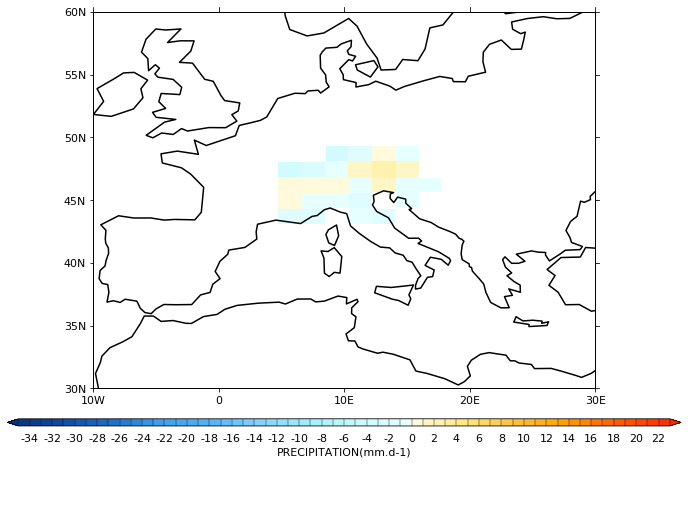

In [11]:
# Create a contour plot of the difference
cfp.con(diff, blockfill=True, lines=False)

In [12]:
# Regrid the regional field to the grid of the global one using the 'patch'
# regridding method
i = g.regrids(f, method='patch')

In [13]:
# Inspect the result
print(i)

Field: long_name=PRECIPITATION (ncvar%PRECIPITATION)
----------------------------------------------------
Data            : long_name=PRECIPITATION(latitude(145), longitude(192)) mm.d-1
Cell methods    : axis=T(1): mean
Dimension coords: latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : axis=T(1) = [1996-07-15 12:00:00] standard


In [14]:
# Take the difference between the two regridded fields
diff = i - h

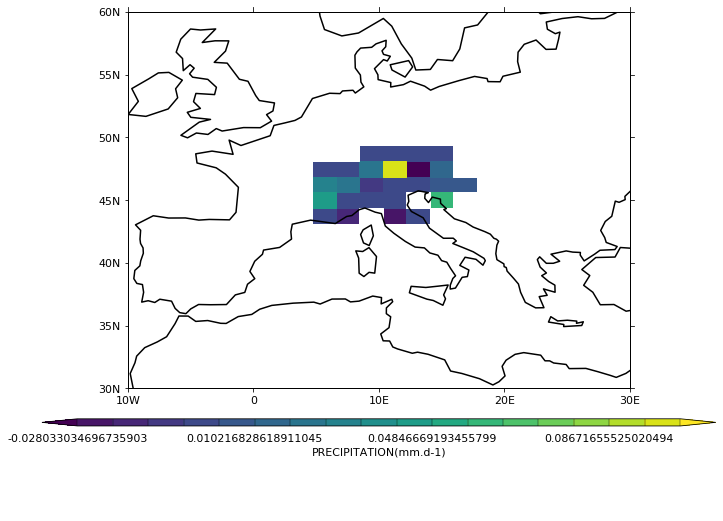

In [15]:
# Create a contour plot of the difference
cfp.con(diff, blockfill=True, lines=False)

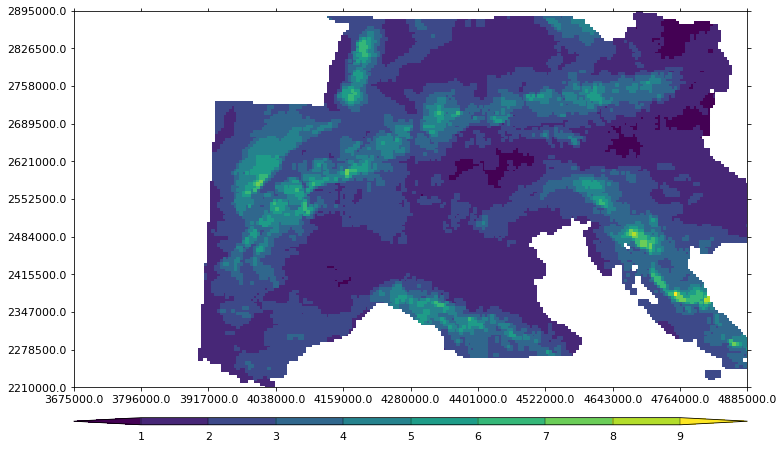

In [16]:
# Create a block plot of the original alpine field (hint: use the array method of
# the field and its coordinates to insert numpy arrays into cfplot.con)
cfp.con(f=g.array, x=g.dim('X').array, y=g.dim('Y').array, blockfill=True, lines=False)

In [17]:
# Create destination dimension coordinates of lower resolution (hint: the units must be
# set to ones of distance and a resolution of 10,000 meters / 10 km is a good example)
import numpy as np
x = cf.DimensionCoordinate(data=cf.Data(np.arange(3675.0, 4895.0, 10.0), 'kilometers'))
y = cf.DimensionCoordinate(data=cf.Data(np.arange(2210.0, 2900.0, 10.0), 'kilometers'))

In [18]:
# Give the coordinates standard names of 'projection_x_coordinate' and
# 'projection_y_coordinate'
x.standard_name = 'projection_x_coordinate'
y.standard_name = 'projection_y_coordinate'

In [19]:
# Do a bilinear cartesian regrid to the lower resolution grid and inspect the result
h = g.regridc({'X': x, 'Y': y}, ('X', 'Y'), method='bilinear')
print(h)

Field: long_name=PRECIPITATION (ncvar%PRECIPITATION)
----------------------------------------------------
Data            : long_name=PRECIPITATION(projection_y_coordinate(69), projection_x_coordinate(122)) mm.d-1
Cell methods    : axis=T(1): mean
Dimension coords: projection_y_coordinate(69) = [2210.0, ..., 2890.0] kilometers
                : projection_x_coordinate(122) = [3675.0, ..., 4885.0] kilometers
                : axis=T(1) = [1996-07-15 12:00:00] standard


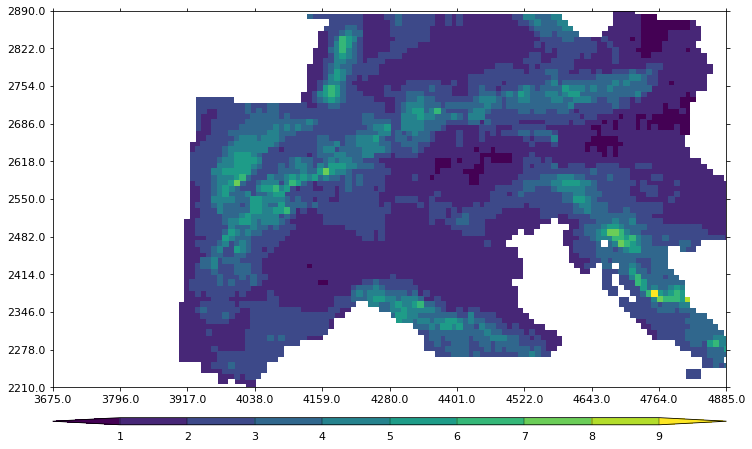

In [20]:
# Plot the regridded field
cfp.con(f=h.array, x=h.dim('X').array, y=h.dim('Y').array, blockfill=True, lines=False)